# Global Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import gc
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = np.loadtxt('LORENZ.DAT')
data = np.array(data).flatten()

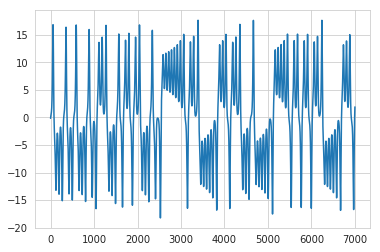

In [3]:
plt.plot(data[0:7000])

In [4]:
# delay, dimension
t, d = 17, 5+1

# create d-dimensional data
lagged = []

for i in range(0, d):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape

(16282, 6)

In [5]:
# calculate 1-d distance, (x, 0)
b = np.vstack((lagged[:, 0], np.zeros(len(lagged[:, 0]))))
pdist = distance.pdist(b.T) # pairwise distances
dist_mat = distance.squareform(pdist) # convert matrix
#np.save('dist_mat',dist_mat)

del b, pdist
gc.collect()
dist_mat.shape

(16282, 16282)

In [6]:
# dist_mat = np.load('dist_mat.npy')
nn = np.zeros(len(dist_mat))

for i in range(0, len(dist_mat)):
    nn[i] = dist_mat[i].argsort()[1]

In [7]:
Rd = np.zeros(len(lagged))
Rd1 = np.zeros(len(lagged))
e = np.zeros(len(lagged))
e_mean = []

for i in range(0, d-1):
    #Rd, Rd1 = 0, 0
    for j in range(0, len(lagged)):
        Rd[j] += np.square(lagged[j][i] - lagged[int(nn[j])][i])
        Rd1[j] += np.square(lagged[j][i+1] - lagged[int(nn[j])][i+1])
        
        if Rd[j] == 0:
            e[j] = 0
        else:
            e[j] = np.sqrt(abs((Rd1[j] - Rd[j])) / Rd[j])
    print(e.mean())
    e_mean.append(e.mean())

34705.83794089653
1.6904693096394658
1.1548490747755398
0.8562298907529223
0.7227235211903997


<IPython.core.display.Javascript object>


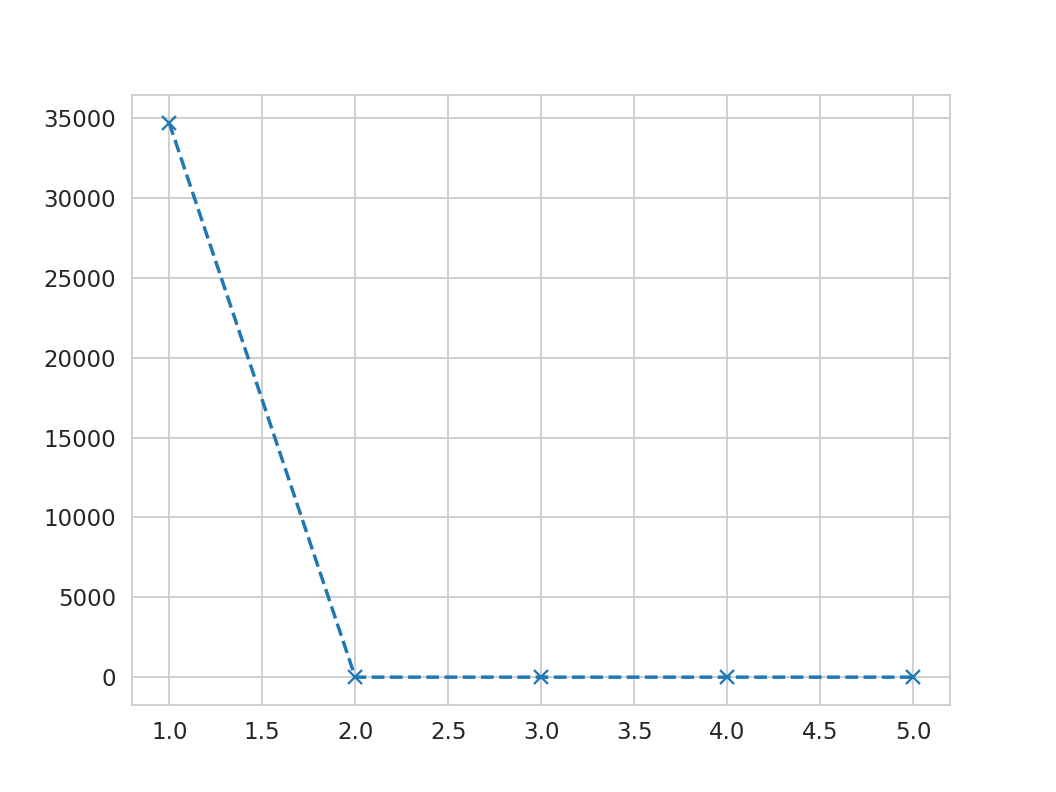

In [8]:
%matplotlib notebook
#plt.figure(figsize=(8,4),dpi=200)
plt.plot((1, 2, 3, 4, 5), e_mean, linestyle='dashed', marker='x')